# **Importing libraries**

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Importing datasets**

In [2]:
from google.colab import files

# Prompt user to upload a folder
uploaded = files.upload()

Saving Colab.zip to Colab.zip


In [3]:
!unzip Colab.zip

Archive:  Colab.zip
   creating: Colab/Exchange rate/
  inflating: Colab/Exchange rate/Exchange_rate_data.csv  
   creating: Colab/Kisumu/
  inflating: Colab/Kisumu/Kisumu_data.csv  
   creating: Colab/Mombasa/
  inflating: Colab/Mombasa/Mombasa_data.csv  
   creating: Colab/Nairobi/
  inflating: Colab/Nairobi/Nairobi_data.csv  


# **Data Analysis**

In [4]:
fuel_data = pd.read_csv('/content/Fuel Data.csv')

In [5]:
fuel_data.head()

,Date,Town,Super,Diesel,Kerosene
0,15/01/2011,Mombasa,92.53,85.59,74.41
1,15/01/2011,Nairobi,95.67,88.71,77.15
2,15/01/2011,Kisumu,97.87,90.91,79.71
3,15/02/2011,Mombasa,94.93,86.59,76.42
4,15/02/2011,Nairobi,98.08,91.72,79.52


In [6]:
fuel_data.shape

(471, 5)

In [7]:
# Convert 'Date' to datetime format
fuel_data['Date'] = pd.to_datetime(fuel_data['Date'], format='%d/%m/%Y')
# Set 'Start Date' as the index
fuel_data.set_index('Date', inplace=True)

In [8]:
fuel_data.columns

Index(['Town', 'Super', 'Diesel ', 'Kerosene'], dtype='object')

In [9]:
fuel_data.isnull().sum()

Town        0
Super       0
Diesel      0
Kerosene    0
dtype: int64

In [10]:
# Remove leading and trailing whitespaces from column names
fuel_data.columns = fuel_data.columns.str.strip()
fuel_data.columns

Index(['Town', 'Super', 'Diesel', 'Kerosene'], dtype='object')

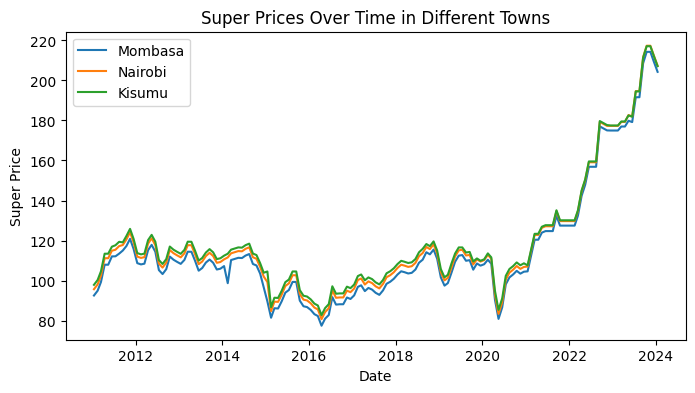

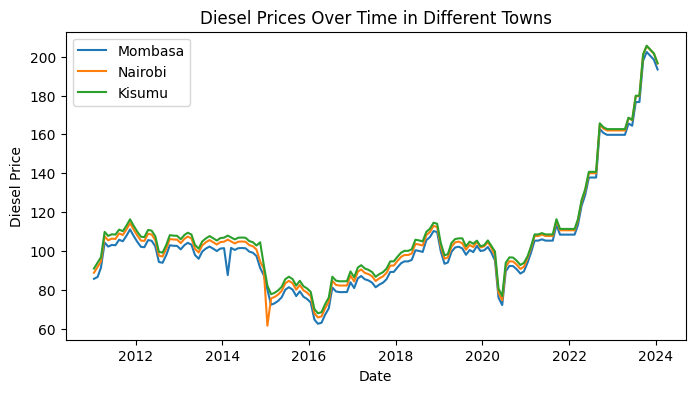

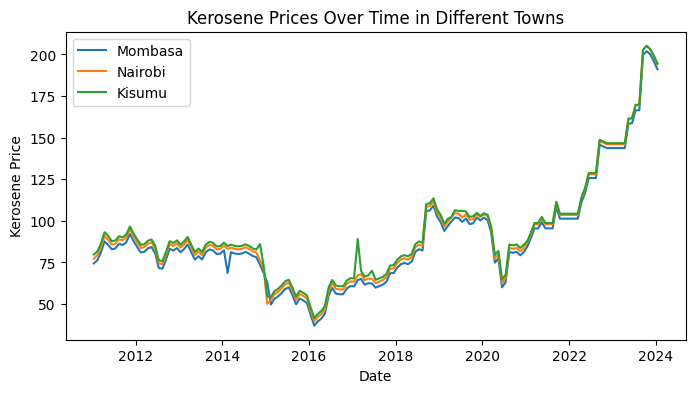

In [11]:
# Plotting line graphs for each fuel type in each town
fuels = ['Super', 'Diesel', 'Kerosene']
towns = fuel_data['Town'].unique()

for fuel in fuels:
    plt.figure(figsize=(8, 4))
    for town in towns:
        town_data = fuel_data[fuel_data['Town'] == town][fuel]
        plt.plot(town_data, label=town)


    plt.title(f'{fuel} Prices Over Time in Different Towns')
    plt.xlabel('Date')
    plt.ylabel(f'{fuel} Price')
    plt.legend()
    plt.show()


In [12]:
pd.set_option('display.max_columns', None)
# Display descriptive statistics for numerical columns
descriptive_stats = fuel_data.groupby('Town').describe()

# Iterate through fuels and print descriptive statistics for each fuel
fuels = ['Super', 'Diesel', 'Kerosene']
for fuel in fuels:
    print(f"Descriptive statistics for {fuel}:\n")
    print(descriptive_stats[fuel])  # Display statistics for the current fuel
    print("\n")


# Display the result
print(descriptive_stats)

Descriptive statistics for Super:

         count        mean        std    min     25%     50%     75%     max
Town                                                                        
Kisumu   157.0  119.768280  28.600019  82.71  103.91  113.42  120.23  217.12
Mombasa  157.0  115.234076  29.457107  77.43   98.39  108.34  115.48  214.30
Nairobi  157.0  118.308790  29.226973  80.71  101.67  111.55  118.50  217.36


Descriptive statistics for Diesel:

         count        mean        std    min    25%     50%     75%     max
Town                                                                       
Kisumu   157.0  108.771274  27.509875  67.88  93.84  105.31  109.87  205.64
Mombasa  157.0  104.019936  28.216525  62.46  87.54  100.27  105.27  202.41
Nairobi  157.0  106.930510  28.199203  61.45  91.72  103.25  108.17  205.47


Descriptive statistics for Kerosene:

         count       mean        std    min    25%    50%     75%     max
Town                                            

In [13]:
#create subsets of the data based on towns and fuels.
towns = fuel_data['Town'].unique()

#Define a function for the Adata test
def adata_test(series, name):
    result = adfuller(series, autolag='AIC')
    print(f'Adata Statistic for {name}:', result[0])
    print(f'p-value for {name}:', result[1])

    if result[1] <= 0.05:
        print(f'The series {name} is stationary.')
    else:
        print(f'The series {name} is not stationary.')
    print('\n')

for town in towns:
    town_data = fuel_data[fuel_data['Town'] == town]

    adata_test(town_data['Super'], 'Super in ' + town)
    adata_test(town_data['Diesel'], 'Diesel in ' + town)
    adata_test(town_data['Kerosene'], 'Kerosene in ' + town)

Adata Statistic for Super in Mombasa: 1.3313320115461982
p-value for Super in Mombasa: 0.996778731540572
The series Super in Mombasa is not stationary.


Adata Statistic for Diesel in Mombasa: 1.042132928993968
p-value for Diesel in Mombasa: 0.9946911944056918
The series Diesel in Mombasa is not stationary.


Adata Statistic for Kerosene in Mombasa: 1.012269859745719
p-value for Kerosene in Mombasa: 0.9943937375190709
The series Kerosene in Mombasa is not stationary.


Adata Statistic for Super in Nairobi: 1.4406164807727961
p-value for Super in Nairobi: 0.9972910662686405
The series Super in Nairobi is not stationary.


Adata Statistic for Diesel in Nairobi: 0.8355863651420705
p-value for Diesel in Nairobi: 0.9921894150379976
The series Diesel in Nairobi is not stationary.


Adata Statistic for Kerosene in Nairobi: 1.0582862727514941
p-value for Kerosene in Nairobi: 0.9948444078118677
The series Kerosene in Nairobi is not stationary.


Adata Statistic for Super in Kisumu: 1.4070109972

In [14]:
# # Filter data for Nairobi
# nairobi_data = fuel_data[fuel_data['Town'] == 'Nairobi']

# # Filter data for Mombasa
# mombasa_data = fuel_data[fuel_data['Town'] == 'Mombasa']

# # Filter data for Kisumu
# kisumu_data = fuel_data[fuel_data['Town'] == 'Kisumu']

# **Modeling**

## **Exchange rate model**

In [15]:
# Load data
exchange_rate_data = pd.read_csv('/content/Colab/Exchange rate/Exchange_rate_data.csv')

In [16]:
exchange_rate_data.head()

,Date,Exchange_Rate
0,15/01/2011,81.03
1,15/02/2011,81.47
2,15/03/2011,84.21
3,15/04/2011,83.89
4,15/05/2011,85.43


In [17]:
exchange_rate_data['Date'] = pd.to_datetime(exchange_rate_data['Date'], infer_datetime_format=True)
exchange_rate_data = exchange_rate_data.set_index(['Date'])
exchange_rate_data.index = pd.DatetimeIndex(exchange_rate_data.index).to_period('M')

In [18]:
#ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC: 568.2353697451542
# Model 'Exchange_Rate'
exchange_rate_model = sm.tsa.statespace.SARIMAX(exchange_rate_data['Exchange_Rate'],
                                                order=(1, 1, 1),
                                                seasonal_order=(1, 1, 0, 12))
exchange_rate_results = exchange_rate_model.fit()

In [19]:
print(exchange_rate_results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                       Exchange_Rate   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -280.118
Date:                             Tue, 02 Apr 2024   AIC                            568.235
Time:                                     11:34:37   BIC                            580.087
Sample:                                 01-31-2011   HQIC                           573.051
                                      - 12-31-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6158      0.055    -11.232      0.000      -0.723      -0.508
ma.L1          0.9707      

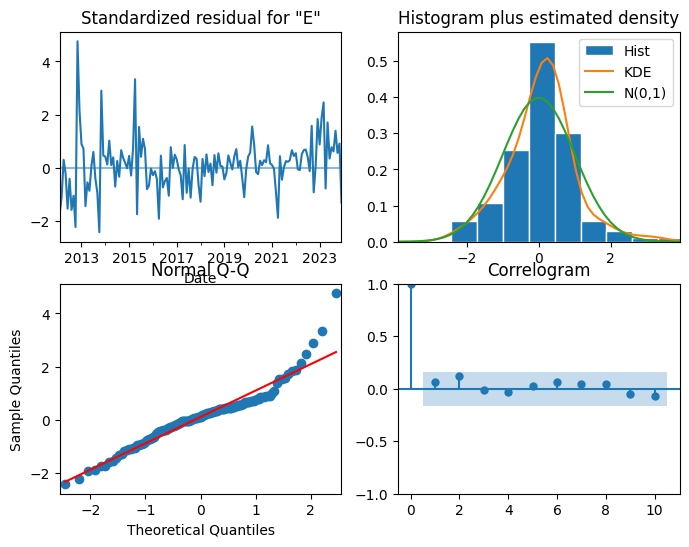

In [20]:
exchange_rate_results.plot_diagnostics(figsize=(8,6))
plt.show()

In [21]:
# Forecast 'Exchange_Rate'
exchange_rate_pred = exchange_rate_results.get_prediction(start=pd.to_datetime('2021-05-15'), dynamic=False)
#exchange_rate_pred_ci = exchange_rate_pred.conf_int()

In [22]:
exchange_rate_forecasted = exchange_rate_pred.predicted_mean

exchange_rate_truth = exchange_rate_data['2021-05-15':]
exchange_rate_truth['Pred_Exchange_Rate'] = exchange_rate_forecasted
print(exchange_rate_truth[['Exchange_Rate', 'Pred_Exchange_Rate']])

         Exchange_Rate  Pred_Exchange_Rate
Date                                      
2021-05         107.61          106.890298
2021-06         107.82          108.592910
2021-07         108.26          108.241517
2021-08         109.46          109.050140
2021-09         110.21          109.845873
2021-10         111.10          110.625173
2021-11         112.33          111.226046
2021-12         113.14          112.403887
2022-01         113.58          112.666001
2022-02         113.79          113.892313
2022-03         114.60          114.764693
2022-04         115.74          114.895757
2022-05         116.89          115.782800
2022-06         118.32          117.171611
2022-07         119.92          119.257808
2022-08         120.64          120.873940
2022-09         123.88          121.225997
2022-10         124.06          125.637567
2022-11         124.20          124.096880
2022-12         128.58          125.493192
2023-01         130.64          129.172407
2023-02    

In [23]:
# Check model accuracy
# R-squared (r2) score
r2 = r2_score(exchange_rate_truth['Exchange_Rate'], exchange_rate_truth['Pred_Exchange_Rate'])
print('r2 score =', r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(exchange_rate_truth['Exchange_Rate'], exchange_rate_truth['Pred_Exchange_Rate'])
print('Mean Absolute Error (MAE) =', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(exchange_rate_truth['Exchange_Rate'], exchange_rate_truth['Pred_Exchange_Rate'])
print('Mean Squared Error (MSE) =', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) =', rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((exchange_rate_truth['Exchange_Rate'] - exchange_rate_truth['Pred_Exchange_Rate']) / exchange_rate_truth['Exchange_Rate'])) * 100
print('Mean Absolute Percentage Error (MAPE) =', mape)
# exchange_rate_r2 = r2_score(exchange_rate_truth['Exchange_Rate'], exchange_rate_truth['Pred_Exchange_Rate'])
# print('r2 score =', exchange_rate_r2)

r2 score = 0.9901426078730496
Mean Absolute Error (MAE) = 1.2539162080145112
Mean Squared Error (MSE) = 2.603824058026351
Root Mean Squared Error (RMSE) = 1.6136369040234395
Mean Absolute Percentage Error (MAPE) = 0.9509292161133895


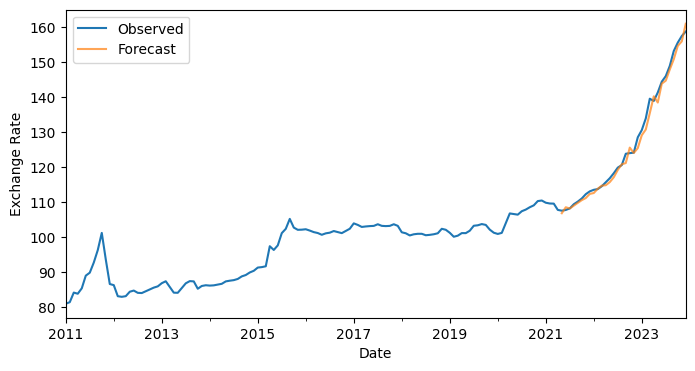

In [24]:
# Plot observed 'Exchange_Rate' and forecasted 'Exchange_Rate'
ax = exchange_rate_data['Exchange_Rate'].plot(label='Observed', figsize=(8, 4))
exchange_rate_pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7)
# ax.fill_between(exchange_rate_pred_ci.index,
#                 exchange_rate_pred_ci.iloc[:, 0],
#                 exchange_rate_pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Exchange Rate')
plt.legend()
plt.show()

In [25]:
# Save models using pickle
pickle.dump(exchange_rate_results, open('exchange_rate_model.pkl', 'wb'))

## **Nairobi models**

In [26]:
nairobi_data = pd.read_csv('/content/Colab/Nairobi/Nairobi_data.csv')

In [27]:
nairobi_data.head()

,Date,Super,Diesel,Kerosene
0,15/01/2011,95.67,88.71,77.51
1,15/02/2011,98.08,91.72,79.52
2,15/03/2011,102.44,94.53,83.97
3,15/04/2011,111.17,107.52,90.91
4,15/05/2011,115.35,108.02,92.61


In [28]:
nairobi_data['Date'] = pd.to_datetime(nairobi_data['Date'], infer_datetime_format=True)
nairobi_data = nairobi_data.set_index(['Date'])
nairobi_data.index = pd.DatetimeIndex(nairobi_data.index).to_period('M')

In [29]:
# Multiply 'Super' prices by 'Exchange_Rate' to create a new column
fuels= ['Super', 'Diesel', 'Kerosene']
for fuel in fuels:
  nairobi_data[f'{fuel}_with_Exchange_Rate'] = nairobi_data[fuel] * exchange_rate_data['Exchange_Rate']

In [30]:
nairobi_data.head()

,Super,Diesel,Kerosene,Super_with_Exchange_Rate,Diesel_with_Exchange_Rate,Kerosene_with_Exchange_Rate
Date,,,,,,
2011-01,95.67,88.71,77.51,7752.1401,7188.1713,6280.6353
2011-02,98.08,91.72,79.52,7990.5776,7472.4284,6478.4944
2011-03,102.44,94.53,83.97,8626.4724,7960.3713,7071.1137
2011-04,111.17,107.52,90.91,9326.0513,9019.8528,7626.4399
2011-05,115.35,108.02,92.61,9854.3505,9228.1486,7911.6723


In [31]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# cols = ['Super_with_Exchange_Rate', 'Diesel_with_Exchange_Rate', 'Kerosene_with_Exchange_Rate']
# nairobi_data[cols] = scaler.fit_transform(nairobi_data[cols])

### Super Model

In [32]:
# Model 'Super_with_Exchange_Rate'
# ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC: 2252.6638961189938
nrb_super_model = sm.tsa.statespace.SARIMAX(nairobi_data['Super_with_Exchange_Rate'],
                                       order=(0, 1, 1),
                                       seasonal_order=(0, 1, 1, 12))
nrb_super_results = nrb_super_model.fit()

In [33]:
print(nrb_super_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:           Super_with_Exchange_Rate   No. Observations:                  156
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1123.333
Date:                            Tue, 02 Apr 2024   AIC                           2252.666
Time:                                    11:34:39   BIC                           2261.555
Sample:                                01-31-2011   HQIC                          2256.278
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2526      0.077      3.283      0.001       0.102       0.403
ma.S.L12      -0.5463      0.052   

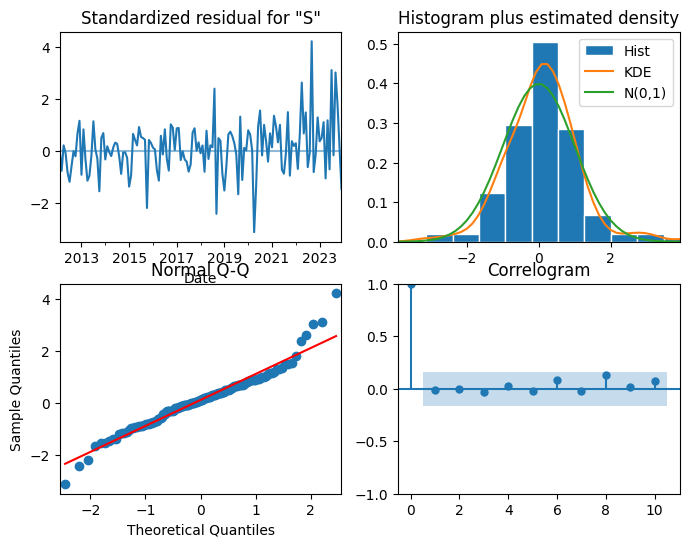

In [34]:
nrb_super_results.plot_diagnostics(figsize=(8,6))
plt.show()

In [35]:
# Forecast 'Super_with_Exchange_Rate'
super_pred = nrb_super_results.get_prediction(start=pd.to_datetime('2021-05-15'), dynamic=False)
# pred_ci = super_pred.conf_int()

In [36]:
# Get the mean forecast
super_forecasted = super_pred.predicted_mean

# Divide 'Super_with_Exchange_Rate' prediction by 'Exchange_Rate' prediction to get final 'Super' prices prediction
final_super_forecasted = super_forecasted / exchange_rate_forecasted

In [37]:
super_truth = nairobi_data['2021-05-15':]
super_truth['Pred_Super'] = final_super_forecasted
print(super_truth[['Super', 'Pred_Super']])

          Super  Pred_Super
Date                       
2021-05  126.37  121.507002
2021-06  127.14  130.382532
2021-07  127.14  132.175759
2021-08  127.14  128.188547
2021-09  134.72  126.864402
2021-10  129.72  135.606038
2021-11  129.72  128.977143
2021-12  129.72  129.566416
2022-01  129.72  129.194564
2022-02  129.72  133.379538
2022-03  134.72  131.180443
2022-04  144.62  131.665572
2022-05  150.12  148.026246
2022-06  159.12  152.955750
2022-07  159.12  163.262135
2022-08  159.12  159.215184
2022-09  179.30  161.888180
2022-10  178.30  180.087209
2022-11  177.30  178.164551
2022-12  177.30  175.391885
2023-01  177.30  177.595053
2023-02  177.30  179.330495
2023-03  179.30  179.813171
2023-04  179.30  182.254408
2023-05  182.70  181.303270
2023-06  182.04  185.826332
2023-07  194.68  183.264372
2023-08  194.68  196.773077
2023-09  211.64  202.675151
2023-10  217.36  211.547573
2023-11  217.36  218.775363
2023-12  212.36  215.015142


In [38]:
# Check model accuracy
# R-squared (r2) score
r2 = r2_score(super_truth['Super'], super_truth['Pred_Super'])
print('r2 score =', r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(super_truth['Super'], super_truth['Pred_Super'])
print('Mean Absolute Error (MAE) =', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(super_truth['Super'], super_truth['Pred_Super'])
print('Mean Squared Error (MSE) =', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) =', rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((super_truth['Super'] - super_truth['Pred_Super']) / super_truth['Super'])) * 100
print('Mean Absolute Percentage Error (MAPE) =', mape)

r2 score = 0.9642008774423517
Mean Absolute Error (MAE) = 3.978330097439648
Mean Squared Error (MSE) = 31.539399616283504
Root Mean Squared Error (RMSE) = 5.615994980079977
Mean Absolute Percentage Error (MAPE) = 2.4720013106374936


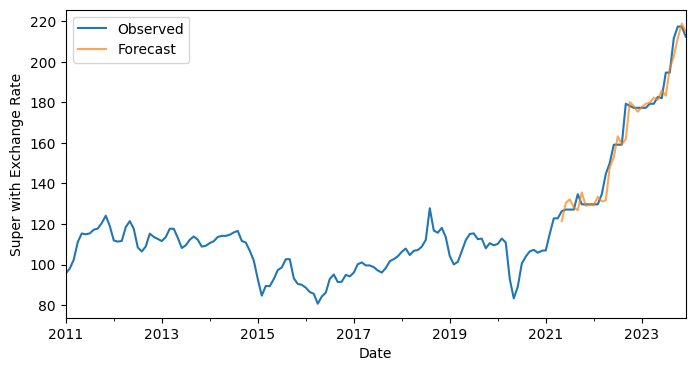

In [39]:
# Plot observed 'Super_with_Exchange_Rate' and forecasted 'Super_with_Exchange_Rate'
ax = nairobi_data['Super'].plot(label='Observed', figsize=(8, 4))
final_super_forecasted.plot(ax=ax, label='Forecast', alpha=0.7)
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Super with Exchange Rate')
plt.legend()
plt.show()

In [40]:
# Save models using pickle
pickle.dump(nrb_super_results, open('nrb_super_model.pkl', 'wb'))

### Diesel Model

In [41]:
# Model 'Diesel_with_Exchange_Rate'
# ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC: 2263.2354481667417
nrb_diesel_model = sm.tsa.statespace.SARIMAX(nairobi_data['Diesel_with_Exchange_Rate'],
                                       order=(0, 1, 1),
                                       seasonal_order=(0, 1, 1, 12))
nrb_diesel_results = nrb_diesel_model.fit()

In [42]:
print(nrb_diesel_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:          Diesel_with_Exchange_Rate   No. Observations:                  156
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1128.662
Date:                            Tue, 02 Apr 2024   AIC                           2263.323
Time:                                    11:34:42   BIC                           2272.212
Sample:                                01-31-2011   HQIC                          2266.935
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1887      0.087      2.177      0.029       0.019       0.359
ma.S.L12      -0.4549      0.052   

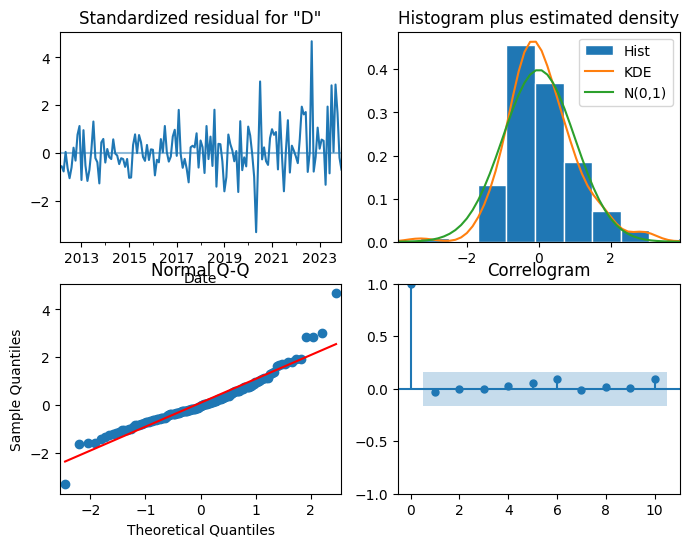

In [43]:
nrb_diesel_results.plot_diagnostics(figsize=(8,6))
plt.show()

In [44]:
# Forecast 'Diesel_with_Exchange_Rate'
diesel_pred = nrb_diesel_results.get_prediction(start=pd.to_datetime('2021-05-15'), dynamic=False)
#pred_ci = diesel_pred.conf_int()

In [45]:
diesel_forecasted = diesel_pred.predicted_mean

# Divide 'Diesel_with_Exchange_Rate' prediction by 'Exchange_Rate' prediction to get final 'Diesel' prices prediction
final_diesel_forecasted = diesel_forecasted / exchange_rate_forecasted

In [46]:
diesel_truth = nairobi_data['2021-05-15':]
diesel_truth['Pred_Diesel'] = final_diesel_forecasted
print(diesel_truth[['Diesel', 'Pred_Diesel']])

         Diesel  Pred_Diesel
Date                        
2021-05  107.66    98.045841
2021-06  107.66   107.356321
2021-07  107.66   117.089061
2021-08  107.66   107.411602
2021-09  115.60   107.909717
2021-10  110.60   115.740279
2021-11  110.60   109.864361
2021-12  110.60   110.691004
2022-01  110.60   112.222602
2022-02  110.60   112.821362
2022-03  115.60   112.054547
2022-04  125.50   115.548485
2022-05  131.00   123.253669
2022-06  140.00   131.941284
2022-07  140.00   144.966425
2022-08  140.00   139.639457
2022-09  165.00   143.846066
2022-10  163.00   164.860775
2022-11  162.00   162.910831
2022-12  162.00   160.502132
2023-01  162.00   162.879229
2023-02  162.00   163.132838
2023-03  162.00   164.496477
2023-04  162.00   166.478494
2023-05  168.40   162.851401
2023-06  167.28   171.680489
2023-07  179.67   168.702532
2023-08  179.67   180.644093
2023-09  200.99   191.899176
2023-10  205.47   199.707162
2023-11  203.47   206.216194
2023-12  201.47   201.400523


In [47]:
# Check model accuracy
# R-squared (r2) score
r2 = r2_score(diesel_truth['Diesel'], diesel_truth['Pred_Diesel'])
print('r2 score =', r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(diesel_truth['Diesel'], diesel_truth['Pred_Diesel'])
print('Mean Absolute Error (MAE) =', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(diesel_truth['Diesel'], diesel_truth['Pred_Diesel'])
print('Mean Squared Error (MSE) =', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) =', rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((diesel_truth['Diesel'] - diesel_truth['Pred_Diesel']) / diesel_truth['Diesel'])) * 100
print('Mean Absolute Percentage Error (MAPE) =', mape)

r2 score = 0.9602815629218947
Mean Absolute Error (MAE) = 4.552996169704028
Mean Squared Error (MSE) = 41.05234926086402
Root Mean Squared Error (RMSE) = 6.407210723931594
Mean Absolute Percentage Error (MAPE) = 3.202358060353842


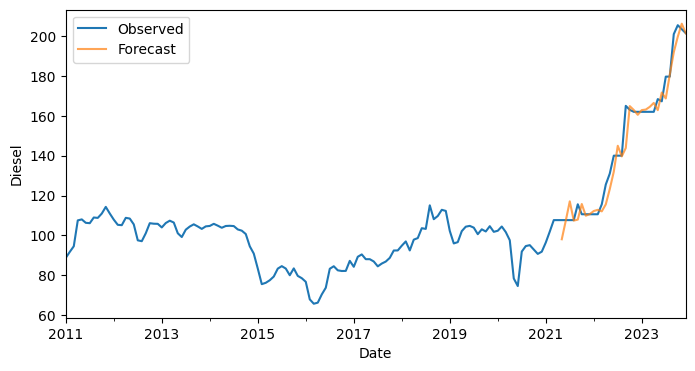

In [48]:
# Plot observed 'Diesel_with_Exchange_Rate' and forecasted 'Diesel_with_Exchange_Rate'
ax = nairobi_data['Diesel'].plot(label='Observed', figsize=(8, 4))
final_diesel_forecasted.plot(ax=ax, label='Forecast', alpha=0.7)
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Diesel')
plt.legend()
plt.show()

In [49]:
# Save models using pickle
pickle.dump(nrb_diesel_results, open('nrb_diesel_model.pkl', 'wb'))

### Kerosene model

In [50]:
# Model 'Kerosene_with_Exchange_Rate'
# ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC: 2289.525107767663
nrb_kerosene_model = sm.tsa.statespace.SARIMAX(nairobi_data['Kerosene_with_Exchange_Rate'],
                                       order=(1, 1, 1),
                                       seasonal_order=(0, 1, 1, 12))
nrb_kerosene_results = nrb_kerosene_model.fit()

In [51]:
print(nrb_kerosene_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:        Kerosene_with_Exchange_Rate   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1140.763
Date:                            Tue, 02 Apr 2024   AIC                           2289.525
Time:                                    11:34:45   BIC                           2301.376
Sample:                                01-31-2011   HQIC                          2294.341
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9700      0.086     11.258      0.000       0.801       1.139
ma.L1         -0.8952      0.124   

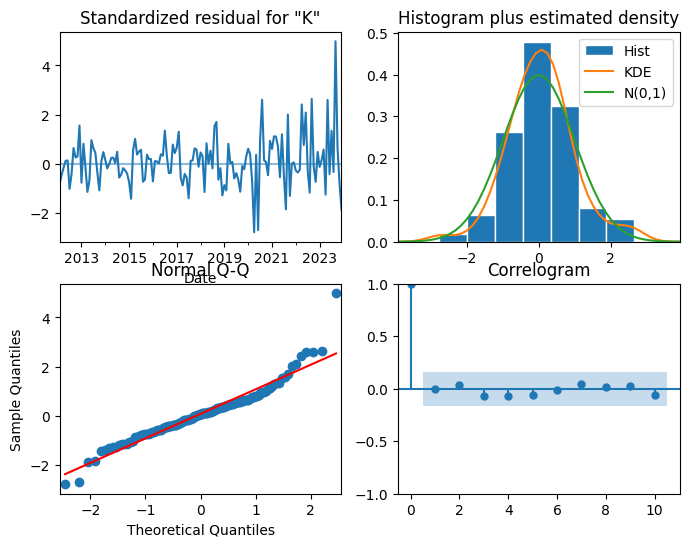

In [52]:
nrb_kerosene_results.plot_diagnostics(figsize=(8,6))
plt.show()

In [53]:
# Forecast 'Kerosene_with_Exchange_Rate'
kerosene_pred = nrb_kerosene_results.get_prediction(start=pd.to_datetime('2021-05-15'), dynamic=False)
#pred_ci = kerosene_pred.conf_int()

In [54]:
kerosene_forecasted = kerosene_pred.predicted_mean

# Divide 'Kerosene_with_Exchange_Rate' prediction by 'Exchange_Rate' prediction to get final 'Kerosene' prices prediction
final_kerosene_forecasted = kerosene_forecasted / exchange_rate_forecasted

In [55]:
kerosene_truth = nairobi_data['2021-05-15':]
kerosene_truth['Pred_Kerosene'] = final_kerosene_forecasted
print(kerosene_truth[['Kerosene', 'Pred_Kerosene']])

         Kerosene  Pred_Kerosene
Date                            
2021-05     97.85     102.007606
2021-06     97.85      89.359188
2021-07     97.85     100.908656
2021-08     97.85     110.029812
2021-09    110.82      98.340027
2021-10    103.54     112.174316
2021-11    103.54     104.457283
2021-12    103.54     103.791315
2022-01    103.54     106.024631
2022-02    103.54     105.552904
2022-03    103.54     104.785704
2022-04    113.44      99.514426
2022-05    118.94     115.376832
2022-06    127.94     116.674542
2022-07    127.94     130.306499
2022-08    127.94     134.399506
2022-09    147.94     135.881462
2022-10    146.94     145.583934
2022-11    145.94     150.137534
2022-12    145.94     146.793619
2023-01    145.94     148.217651
2023-02    145.94     148.625542
2023-03    145.94     147.367945
2023-04    145.94     150.747608
2023-05    161.13     151.285734
2023-06    161.48     164.089664
2023-07    169.48     164.465392
2023-08    169.48     172.175254
2023-09   

In [56]:
# Check model accuracy
# R-squared (r2) score
r2 = r2_score(kerosene_truth['Kerosene'], kerosene_truth['Pred_Kerosene'])
print('r2 score =', r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(kerosene_truth['Kerosene'], kerosene_truth['Pred_Kerosene'])
print('Mean Absolute Error (MAE) =', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(kerosene_truth['Kerosene'], kerosene_truth['Pred_Kerosene'])
print('Mean Squared Error (MSE) =', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) =', rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((kerosene_truth['Kerosene'] - kerosene_truth['Pred_Kerosene']) / kerosene_truth['Kerosene'])) * 100
print('Mean Absolute Percentage Error (MAPE) =', mape)

r2 score = 0.9533344888774118
Mean Absolute Error (MAE) = 5.4969934417804875
Mean Squared Error (MSE) = 52.209123085187095
Root Mean Squared Error (RMSE) = 7.225588078847776
Mean Absolute Percentage Error (MAPE) = 4.198286662209401


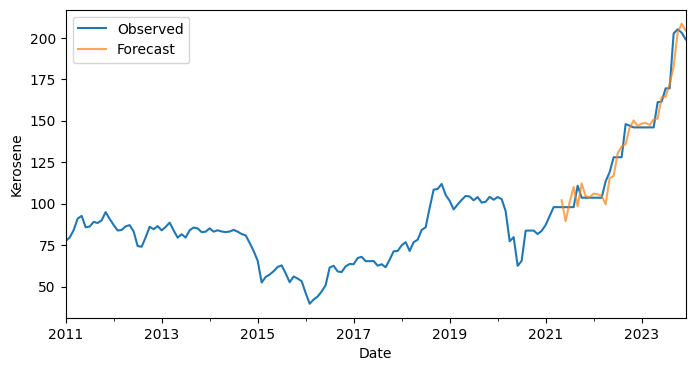

In [57]:
# Plot observed 'Kerosene_with_Exchange_Rate' and forecasted 'Kerosene_with_Exchange_Rate'
ax = nairobi_data['Kerosene'].plot(label='Observed', figsize=(8, 4))
final_kerosene_forecasted.plot(ax=ax, label='Forecast', alpha=0.7)
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Kerosene')
plt.legend()
plt.show()

In [58]:
# Save models using pickle
pickle.dump(nrb_kerosene_results, open('nrb_kerosene_model.pkl', 'wb'))

## **Mombasa Models**

In [59]:
mombasa_data = pd.read_csv('/content/Colab/Mombasa/Mombasa_data.csv')

In [60]:
mombasa_data.head()

,Date,Super,Diesel,Kerosene
0,15/01/2011,92.53,85.59,74.41
1,15/02/2011,94.93,86.59,76.42
2,15/03/2011,99.28,91.39,80.86
3,15/04/2011,107.92,104.28,87.70
4,15/05/2011,107.92,102.20,85.53


In [61]:
mombasa_data['Date'] = pd.to_datetime(mombasa_data['Date'], infer_datetime_format=True)
mombasa_data = mombasa_data.set_index(['Date'])
mombasa_data.index = pd.DatetimeIndex(mombasa_data.index).to_period('M')

In [62]:
mombasa_data.columns = mombasa_data.columns.str.strip()

In [63]:
# Multiply 'Super' prices by 'Exchange_Rate' to create a new column
fuels= ['Super', 'Diesel', 'Kerosene']
for fuel in fuels:
  mombasa_data[f'{fuel}_with_Exchange_Rate'] = mombasa_data[fuel] * exchange_rate_data['Exchange_Rate']

In [64]:
mombasa_data.head()

,Super,Diesel,Kerosene,Super_with_Exchange_Rate,Diesel_with_Exchange_Rate,Kerosene_with_Exchange_Rate
Date,,,,,,
2011-01,92.53,85.59,74.41,7497.7059,6935.3577,6029.4423
2011-02,94.93,86.59,76.42,7733.9471,7054.4873,6225.9374
2011-03,99.28,91.39,80.86,8360.3688,7695.9519,6809.2206
2011-04,107.92,104.28,87.70,9053.4088,8748.0492,7357.1530
2011-05,107.92,102.20,85.53,9219.6056,8730.9460,7306.8279


### Super Model

In [65]:
# Model 'Super_with_Exchange_Rate'
# ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC: 2234.544141060338
mbs_super_model = sm.tsa.statespace.SARIMAX(mombasa_data['Super_with_Exchange_Rate'],
                                       order=(1, 1, 0),
                                       seasonal_order=(0, 1, 1, 12))
mbs_super_results = mbs_super_model.fit()

In [66]:
print(mbs_super_results.summary())

                                      SARIMAX Results                                       
Dep. Variable:             Super_with_Exchange_Rate   No. Observations:                  156
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -1114.272
Date:                              Tue, 02 Apr 2024   AIC                           2234.544
Time:                                      11:34:47   BIC                           2243.433
Sample:                                  01-31-2011   HQIC                          2238.156
                                       - 12-31-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3069      0.082      3.734      0.000       0.146       0.468
ma.S.L12      -0.58

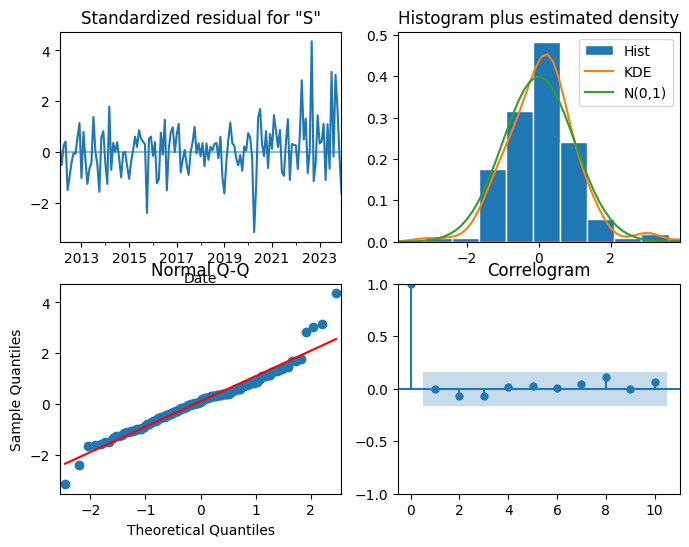

In [67]:
mbs_super_results.plot_diagnostics(figsize=(8,6))
plt.show()

In [68]:
# Forecast 'Super_with_Exchange_Rate'
super_pred = mbs_super_results.get_prediction(start=pd.to_datetime('2021-05-15'), dynamic=False)
#pred_ci = super_pred.conf_int()

In [69]:
super_forecasted = super_pred.predicted_mean

# Divide 'Super_with_Exchange_Rate' prediction by 'Exchange_Rate' prediction to get final 'Super' prices prediction
final_super_forecasted = super_forecasted / exchange_rate_forecasted

In [70]:
super_truth = mombasa_data['2021-05-15':]
super_truth['Pred_Super'] = final_super_forecasted
print(super_truth[['Super', 'Pred_Super']])

          Super  Pred_Super
Date                       
2021-05  123.95  120.129483
2021-06  124.72  128.065555
2021-07  124.72  129.737588
2021-08  124.72  123.167156
2021-09  132.46  126.122955
2021-10  127.46  133.732343
2021-11  127.46  127.088675
2021-12  127.46  126.848278
2022-01  127.46  127.151171
2022-02  127.46  130.754085
2022-03  132.46  128.979961
2022-04  142.36  129.251654
2022-05  147.86  146.838441
2022-06  156.86  151.930798
2022-07  156.86  161.758090
2022-08  156.86  156.285114
2022-09  177.04  160.204850
2022-10  176.04  179.081394
2022-11  175.04  177.242328
2022-12  174.98  172.669925
2023-01  174.98  175.480411
2023-02  174.98  177.432288
2023-03  176.98  177.682675
2023-04  176.98  179.828815
2023-05  179.86  179.039518
2023-06  179.20  182.548870
2023-07  191.62  180.792849
2023-08  191.62  193.648676
2023-09  208.58  200.224688
2023-10  214.30  209.336730
2023-11  214.30  217.053483
2023-12  209.30  212.255998


In [71]:
# Check model accuracy
# R-squared (r2) score
r2 = r2_score(super_truth['Super'], super_truth['Pred_Super'])
print('r2 score =', r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(super_truth['Super'], super_truth['Pred_Super'])
print('Mean Absolute Error (MAE) =', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(super_truth['Super'], super_truth['Pred_Super'])
print('Mean Squared Error (MSE) =', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) =', rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((super_truth['Super'] - super_truth['Pred_Super']) / super_truth['Super'])) * 100
print('Mean Absolute Percentage Error (MAPE) =', mape)

r2 score = 0.9661554770970351
Mean Absolute Error (MAE) = 3.9340736218485386
Mean Squared Error (MSE) = 29.36455404815215
Root Mean Squared Error (RMSE) = 5.418907089824677
Mean Absolute Percentage Error (MAPE) = 2.4705008031896405


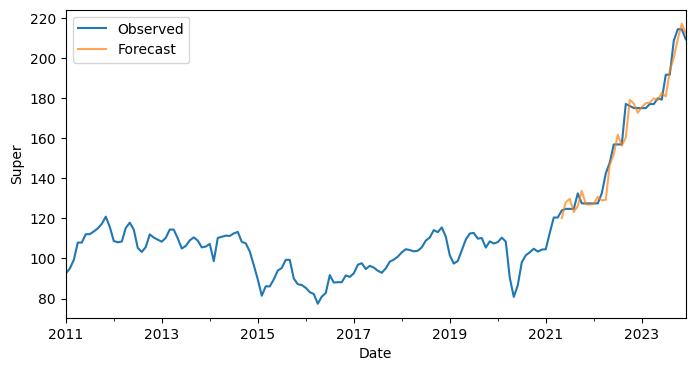

In [72]:
# Plot observed 'Super_with_Exchange_Rate' and forecasted 'Super_with_Exchange_Rate'
ax = mombasa_data['Super'].plot(label='Observed', figsize=(8, 4))
final_super_forecasted.plot(ax=ax, label='Forecast', alpha=0.7)
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Super')
plt.legend()
plt.show()

In [73]:
# Save models using pickle
pickle.dump(mbs_super_results, open('mbs_super_model.pkl', 'wb'))

### Diesel model

In [74]:
# Model 'Diesel_with_Exchange_Rate'
# ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC: 2259.406611747755
mbs_diesel_model = sm.tsa.statespace.SARIMAX(mombasa_data['Diesel_with_Exchange_Rate'],
                                       order=(1, 1, 0),
                                       seasonal_order=(0, 1, 1, 12))
mbs_diesel_results = mbs_diesel_model.fit()

In [75]:
print(mbs_diesel_results.summary())

                                      SARIMAX Results                                       
Dep. Variable:            Diesel_with_Exchange_Rate   No. Observations:                  156
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -1126.703
Date:                              Tue, 02 Apr 2024   AIC                           2259.407
Time:                                      11:34:49   BIC                           2268.295
Sample:                                  01-31-2011   HQIC                          2263.018
                                       - 12-31-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2021      0.084      2.402      0.016       0.037       0.367
ma.S.L12      -0.52

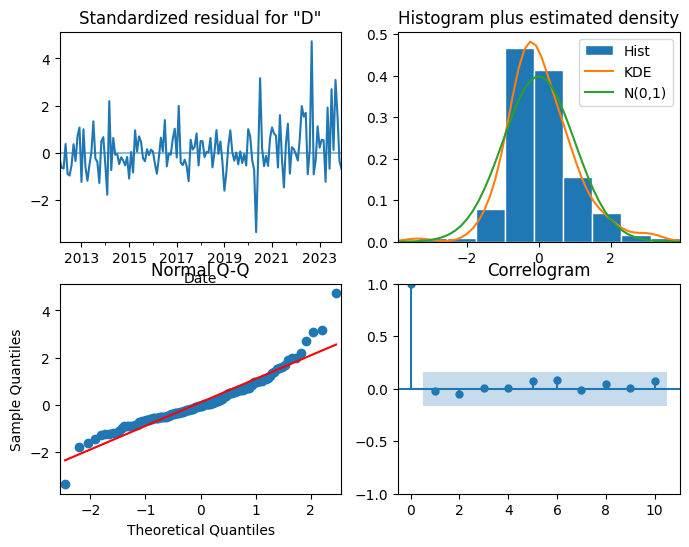

In [76]:
mbs_diesel_results.plot_diagnostics(figsize=(8,6))
plt.show()

In [77]:
# Forecast 'Diesel_with_Exchange_Rate'
diesel_pred = mbs_diesel_results.get_prediction(start=pd.to_datetime('2021-05-15'), dynamic=False)
#pred_ci = diesel_pred.conf_int()

In [78]:
diesel_forecasted = diesel_pred.predicted_mean

# Divide 'Diesel_with_Exchange_Rate' prediction by 'Exchange_Rate' prediction to get final 'Diesel' prices prediction
final_diesel_forecasted = diesel_forecasted / exchange_rate_forecasted

In [79]:
diesel_truth = mombasa_data['2021-05-15':]
diesel_truth['Pred_Diesel'] = final_diesel_forecasted
print(diesel_truth[['Diesel', 'Pred_Diesel']])

         Diesel  Pred_Diesel
Date                        
2021-05  105.94    97.207833
2021-06  105.27   105.910153
2021-07  105.27   113.838279
2021-08  105.27   103.515417
2021-09  113.36   106.654530
2021-10  108.36   113.865519
2021-11  108.36   108.074652
2021-12  108.36   108.215074
2022-01  108.36   109.538537
2022-02  108.36   110.085019
2022-03  113.36   109.826556
2022-04  123.26   113.280511
2022-05  128.76   121.624677
2022-06  137.76   129.967623
2022-07  137.76   143.322513
2022-08  137.76   136.995018
2022-09  162.76   141.701236
2022-10  160.76   163.322742
2022-11  159.76   161.532705
2022-12  159.76   158.034644
2023-01  159.76   160.490373
2023-02  159.76   161.004095
2023-03  159.76   162.160787
2023-04  159.76   163.755071
2023-05  165.57   160.264823
2023-06  164.45   168.057470
2023-07  176.63   166.449895
2023-08  176.63   177.326900
2023-09  197.93   188.073792
2023-10  202.41   197.213080
2023-11  200.41   203.782125
2023-12  198.41   198.283085


In [80]:
# Check model accuracy
# R-squared (r2) score
r2 = r2_score(diesel_truth['Diesel'], diesel_truth['Pred_Diesel'])
print('r2 score =', r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(diesel_truth['Diesel'], diesel_truth['Pred_Diesel'])
print('Mean Absolute Error (MAE) =', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(diesel_truth['Diesel'], diesel_truth['Pred_Diesel'])
print('Mean Squared Error (MSE) =', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) =', rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((diesel_truth['Diesel'] - diesel_truth['Pred_Diesel']) / diesel_truth['Diesel'])) * 100
print('Mean Absolute Percentage Error (MAPE) =', mape)

r2 score = 0.9616316189162778
Mean Absolute Error (MAE) = 4.494995051786126
Mean Squared Error (MSE) = 39.02859414641571
Root Mean Squared Error (RMSE) = 6.247286942858933
Mean Absolute Percentage Error (MAPE) = 3.2045329159689087


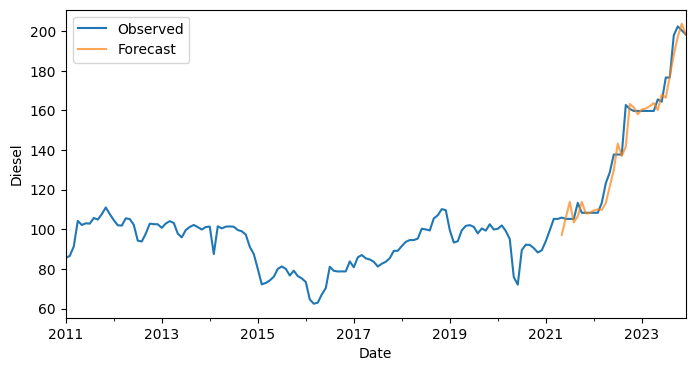

In [81]:
# Plot observed 'Diesel_with_Exchange_Rate' and forecasted 'Diesel_with_Exchange_Rate'
ax = mombasa_data['Diesel'].plot(label='Observed', figsize=(8, 4))
final_diesel_forecasted.plot(ax=ax, label='Forecast', alpha=0.7)
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Diesel')
plt.legend()
plt.show()

In [82]:
# Save models using pickle
pickle.dump(mbs_diesel_results, open('mbs_diesel_model.pkl', 'wb'))

### Kerosene Model

In [83]:
# Model 'Kerosene_with_Exchange_Rate'
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC: 2296.51566555668
mbs_kerosene_model = sm.tsa.statespace.SARIMAX(mombasa_data['Kerosene_with_Exchange_Rate'],
                                       order=(1, 1, 1),
                                       seasonal_order=(1, 1, 1, 12))
mbs_kerosene_results = mbs_kerosene_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [84]:
print(mbs_kerosene_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:        Kerosene_with_Exchange_Rate   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1143.258
Date:                            Tue, 02 Apr 2024   AIC                           2296.516
Time:                                    11:34:53   BIC                           2311.330
Sample:                                01-31-2011   HQIC                          2302.535
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9831      0.082     12.027      0.000       0.823       1.143
ma.L1         -0.9180      0.116   

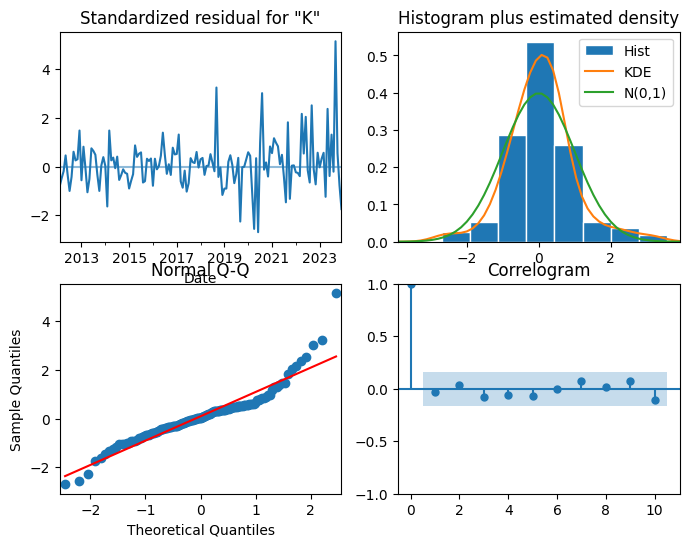

In [85]:
mbs_kerosene_results.plot_diagnostics(figsize=(8,6))
plt.show()

In [86]:
# Forecast 'Kerosene_with_Exchange_Rate'
kerosene_pred = mbs_kerosene_results.get_prediction(start=pd.to_datetime('2021-05-15'), dynamic=False)
#pred_ci = kerosene_pred.conf_int()

In [87]:
kerosene_forecasted = kerosene_pred.predicted_mean

# Divide 'Kerosene_with_Exchange_Rate' prediction by 'Exchange_Rate' prediction to get final 'Kerosene' prices prediction
final_kerosene_forecasted = kerosene_forecasted / exchange_rate_forecasted

In [88]:
kerosene_truth = mombasa_data['2021-05-15':]
kerosene_truth['Pred_Kerosene'] = final_kerosene_forecasted
print(kerosene_truth[['Kerosene', 'Pred_Kerosene']])

         Kerosene  Pred_Kerosene
Date                            
2021-05     99.15      99.182759
2021-06     95.46      91.662046
2021-07     95.46      98.260666
2021-08     95.46     105.345081
2021-09    108.57      97.259675
2021-10    101.29     110.199944
2021-11    101.29     102.076639
2021-12    101.29     101.661487
2022-01    101.29     103.597722
2022-02    101.29     102.837750
2022-03    101.29     103.583127
2022-04    111.19      98.714431
2022-05    116.69     114.553539
2022-06    125.69     114.628405
2022-07    125.69     127.311626
2022-08    125.69     129.284643
2022-09    145.69     134.249019
2022-10    144.69     143.468893
2022-11    143.69     147.981191
2022-12    143.69     144.040886
2023-01    143.69     145.514333
2023-02    143.69     145.468584
2023-03    143.69     145.154098
2023-04    143.69     148.588864
2023-05    158.30     149.513427
2023-06    158.65     161.197302
2023-07    166.45     161.557000
2023-08    166.43     168.597550
2023-09   

In [89]:
# Check model accuracy
# R-squared (r2) score
r2 = r2_score(kerosene_truth['Kerosene'], kerosene_truth['Pred_Kerosene'])
print('r2 score =', r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(kerosene_truth['Kerosene'], kerosene_truth['Pred_Kerosene'])
print('Mean Absolute Error (MAE) =', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(kerosene_truth['Kerosene'], kerosene_truth['Pred_Kerosene'])
print('Mean Squared Error (MSE) =', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) =', rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((kerosene_truth['Kerosene'] - kerosene_truth['Pred_Kerosene']) / kerosene_truth['Kerosene'])) * 100
print('Mean Absolute Percentage Error (MAPE) =', mape)

r2 score = 0.9591018217354653
Mean Absolute Error (MAE) = 4.788567191778775
Mean Squared Error (MSE) = 44.70325043286755
Root Mean Squared Error (RMSE) = 6.68604894035839
Mean Absolute Percentage Error (MAPE) = 3.636852582408359


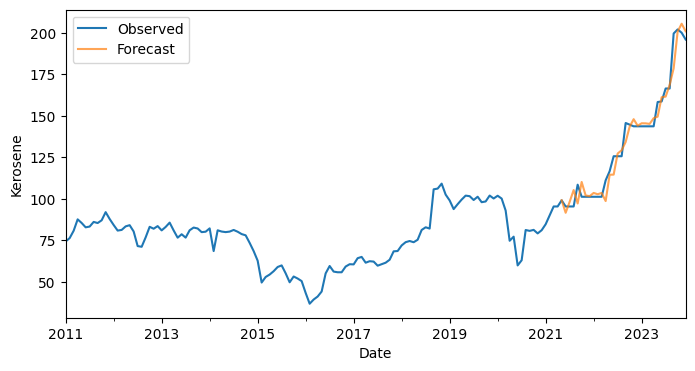

In [90]:
# Plot observed 'Kerosene_with_Exchange_Rate' and forecasted 'Kerosene_with_Exchange_Rate'
ax = mombasa_data['Kerosene'].plot(label='Observed', figsize=(8, 4))
final_kerosene_forecasted.plot(ax=ax, label='Forecast', alpha=0.7)
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Kerosene')
plt.legend()
plt.show()

In [91]:
# Save models using pickle
pickle.dump(mbs_kerosene_results, open('mbs_kerosene_model.pkl', 'wb'))

## **Kisumu Models**

In [92]:
kisumu_data = pd.read_csv('/content/Colab/Kisumu/Kisumu_data.csv')

In [93]:
kisumu_data['Date'] = pd.to_datetime(kisumu_data['Date'], infer_datetime_format=True)
kisumu_data = kisumu_data.set_index(['Date'])
kisumu_data.index = pd.DatetimeIndex(kisumu_data.index).to_period('M')

In [94]:
kisumu_data.columns = kisumu_data.columns.str.strip()

In [95]:
# Multiply 'Super' prices by 'Exchange_Rate' to create a new column
fuels= ['Super', 'Diesel', 'Kerosene']
for fuel in fuels:
  kisumu_data[f'{fuel}_with_Exchange_Rate'] = kisumu_data[fuel] * exchange_rate_data['Exchange_Rate']

In [96]:
kisumu_data.head()

,Super,Diesel,Kerosene,Super_with_Exchange_Rate,Diesel_with_Exchange_Rate,Kerosene_with_Exchange_Rate
Date,,,,,,
2011-01,97.87,90.91,79.71,7930.4061,7366.4373,6458.9013
2011-02,100.28,93.92,81.73,8169.8116,7651.6624,6658.5431
2011-03,104.64,96.73,86.17,8811.7344,8145.6333,7256.3757
2011-04,113.42,109.77,93.16,9514.8038,9208.6053,7815.1924
2011-05,113.42,107.70,90.98,9689.4706,9200.8110,7772.4214


### Super Model

In [97]:
# Model 'Super_with_Exchange_Rate'
# ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC: 2239.7394990967305
ksm_super_model = sm.tsa.statespace.SARIMAX(kisumu_data['Super_with_Exchange_Rate'],
                                       order=(1, 1, 0),
                                       seasonal_order=(0, 1, 1, 12))
ksm_super_results = ksm_super_model.fit()

In [98]:
print(ksm_super_results.summary())

                                      SARIMAX Results                                       
Dep. Variable:             Super_with_Exchange_Rate   No. Observations:                  156
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -1116.870
Date:                              Tue, 02 Apr 2024   AIC                           2239.739
Time:                                      11:34:56   BIC                           2248.628
Sample:                                  01-31-2011   HQIC                          2243.351
                                       - 12-31-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2810      0.084      3.363      0.001       0.117       0.445
ma.S.L12      -0.59

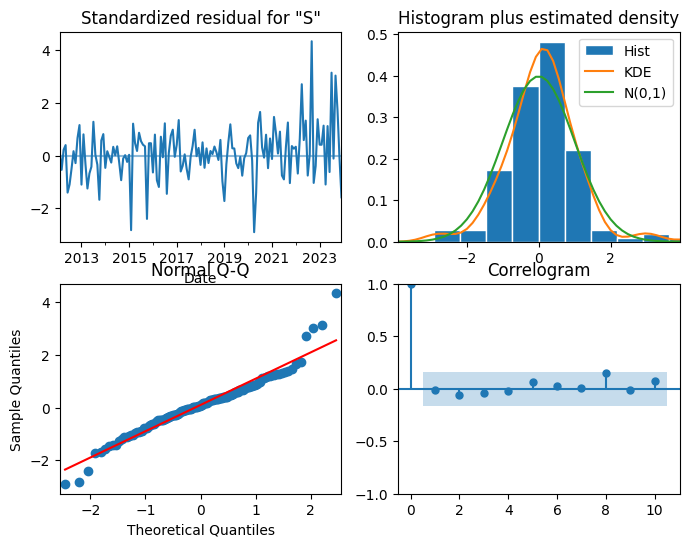

In [99]:
ksm_super_results.plot_diagnostics(figsize=(8,6))
plt.show()

In [100]:
# Forecast 'Super_with_Exchange_Rate'
super_pred = ksm_super_results.get_prediction(start=pd.to_datetime('2021-05-15'), dynamic=False)
#pred_ci = super_pred.conf_int()

In [101]:
super_forecasted = super_pred.predicted_mean

# Divide 'Super_with_Exchange_Rate' prediction by 'Exchange_Rate' prediction to get final 'Super' prices prediction
final_super_forecasted = super_forecasted / exchange_rate_forecasted

In [102]:
super_truth = kisumu_data['2021-05-15':]
super_truth['Pred_Super'] = final_super_forecasted
print(super_truth[['Super', 'Pred_Super']])

          Super  Pred_Super
Date                       
2021-05  126.90  122.755625
2021-06  127.67  130.834395
2021-07  127.67  132.579221
2021-08  127.67  126.381160
2021-09  135.13  128.859667
2021-10  130.12  136.207847
2021-11  130.12  129.493736
2021-12  130.12  129.596574
2022-01  130.12  129.416381
2022-02  130.12  133.504147
2022-03  135.13  131.585057
2022-04  145.03  132.254734
2022-05  150.53  148.977952
2022-06  159.53  154.436575
2022-07  159.53  164.132053
2022-08  159.53  159.055935
2022-09  179.71  162.635668
2022-10  178.71  181.301014
2022-11  177.71  179.708656
2022-12  177.50  175.408295
2023-01  177.50  177.625319
2023-02  177.50  179.961706
2023-03  179.50  180.067115
2023-04  179.50  182.376118
2023-05  182.53  181.560497
2023-06  181.87  185.127141
2023-07  194.52  183.503383
2023-08  194.52  196.315419
2023-09  211.40  202.871091
2023-10  217.12  211.866153
2023-11  217.12  219.544579
2023-12  212.12  214.946136


In [103]:
# Check model accuracy
# R-squared (r2) score
r2 = r2_score(super_truth['Super'], super_truth['Pred_Super'])
print('r2 score =', r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(super_truth['Super'], super_truth['Pred_Super'])
print('Mean Absolute Error (MAE) =', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(super_truth['Super'], super_truth['Pred_Super'])
print('Mean Squared Error (MSE) =', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) =', rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((super_truth['Super'] - super_truth['Pred_Super']) / super_truth['Super'])) * 100
print('Mean Absolute Percentage Error (MAPE) =', mape)

r2 score = 0.966161613464549
Mean Absolute Error (MAE) = 3.906324527464687
Mean Squared Error (MSE) = 29.347109115302114
Root Mean Squared Error (RMSE) = 5.41729721496819
Mean Absolute Percentage Error (MAPE) = 2.413203614326113


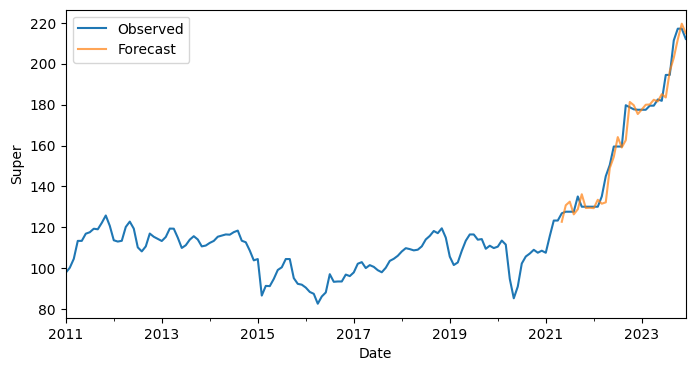

In [104]:
# Plot observed 'Super_with_Exchange_Rate' and forecasted 'Super_with_Exchange_Rate'
ax = kisumu_data['Super'].plot(label='Observed', figsize=(8, 4))
final_super_forecasted.plot(ax=ax, label='Forecast', alpha=0.7)
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Super')
plt.legend()
plt.show()

In [105]:
# Save models using pickle
pickle.dump(ksm_super_results, open('ksm_super_model.pkl', 'wb'))

### Diesel Model

In [106]:
# Model 'Diesel_with_Exchange_Rate'
# ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC: 2253.4510915457813
ksm_diesel_model = sm.tsa.statespace.SARIMAX(kisumu_data['Diesel_with_Exchange_Rate'],
                                       order=(0, 1, 1),
                                       seasonal_order=(0, 1, 1, 12))
ksm_diesel_results = ksm_diesel_model.fit()

In [107]:
print(ksm_diesel_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:          Diesel_with_Exchange_Rate   No. Observations:                  156
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1123.726
Date:                            Tue, 02 Apr 2024   AIC                           2253.451
Time:                                    11:34:58   BIC                           2262.340
Sample:                                01-31-2011   HQIC                          2257.063
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2526      0.080      3.154      0.002       0.096       0.410
ma.S.L12      -0.4958      0.052   

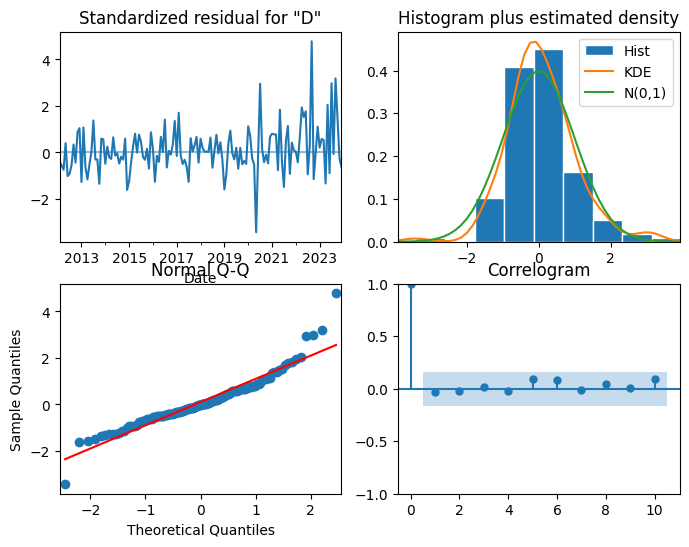

In [108]:
ksm_diesel_results.plot_diagnostics(figsize=(8,6))
plt.show()

In [109]:
# Forecast 'Diesel_with_Exchange_Rate'
diesel_pred = ksm_diesel_results.get_prediction(start=pd.to_datetime('2021-05-15'), dynamic=False)
#pred_ci = diesel_pred.conf_int()

In [110]:
diesel_forecasted = diesel_pred.predicted_mean

# Divide 'Diesel_with_Exchange_Rate' prediction by 'Exchange_Rate' prediction to get final 'Diesel' prices prediction
final_diesel_forecasted = diesel_forecasted / exchange_rate_forecasted

In [111]:
diesel_truth = kisumu_data['2021-05-15':]
diesel_truth['Pred_Diesel'] = final_diesel_forecasted
print(diesel_truth[['Diesel', 'Pred_Diesel']])

         Diesel  Pred_Diesel
Date                        
2021-05  109.14    99.254204
2021-06  108.46   109.801435
2021-07  108.46   116.956905
2021-08  108.46   106.138344
2021-09  116.30   110.275434
2021-10  111.30   116.926585
2021-11  111.30   110.080964
2021-12  111.30   111.520741
2022-01  111.30   112.031274
2022-02  111.30   113.500256
2022-03  116.30   112.628336
2022-04  126.20   116.707263
2022-05  131.70   124.830848
2022-06  140.70   132.740131
2022-07  140.70   146.367736
2022-08  140.70   139.178551
2022-09  165.70   144.946131
2022-10  163.70   167.273426
2022-11  162.70   162.857136
2022-12  162.70   161.252720
2023-01  162.70   163.540831
2023-02  162.70   163.906889
2023-03  162.70   165.257810
2023-04  162.70   167.022305
2023-05  168.60   162.953198
2023-06  167.49   171.991457
2023-07  179.89   168.791220
2023-08  179.89   181.415799
2023-09  201.16   191.234484
2023-10  205.64   200.940232
2023-11  203.64   206.589749
2023-12  201.64   201.279037


In [112]:
# Check model accuracy
# R-squared (r2) score
r2 = r2_score(diesel_truth['Diesel'], diesel_truth['Pred_Diesel'])
print('r2 score =', r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(diesel_truth['Diesel'], diesel_truth['Pred_Diesel'])
print('Mean Absolute Error (MAE) =', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(diesel_truth['Diesel'], diesel_truth['Pred_Diesel'])
print('Mean Squared Error (MSE) =', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) =', rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((diesel_truth['Diesel'] - diesel_truth['Pred_Diesel']) / diesel_truth['Diesel'])) * 100
print('Mean Absolute Percentage Error (MAPE) =', mape)

r2 score = 0.9607765777681347
Mean Absolute Error (MAE) = 4.650601130341926
Mean Squared Error (MSE) = 40.02037208656243
Root Mean Squared Error (RMSE) = 6.326165670179878
Mean Absolute Percentage Error (MAPE) = 3.2555411136016454


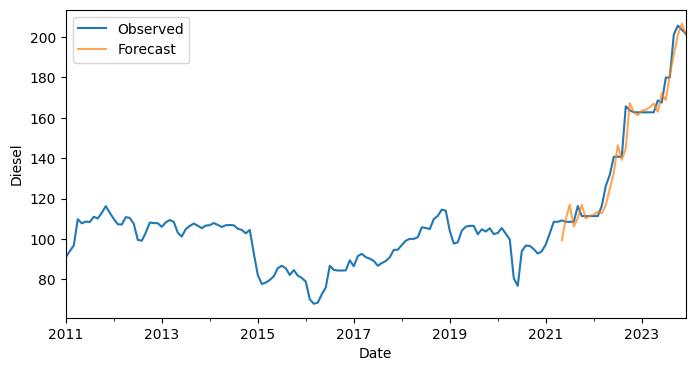

In [113]:
# Plot observed 'Diesel_with_Exchange_Rate' and forecasted 'Diesel_with_Exchange_Rate'
ax = kisumu_data['Diesel'].plot(label='Observed', figsize=(8, 4))
final_diesel_forecasted.plot(ax=ax, label='Forecast', alpha=0.7)
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Diesel')
plt.legend()
plt.show()

In [114]:
# Save models using pickle
pickle.dump(ksm_diesel_results, open('ksm_diesel_model.pkl', 'wb'))

### Kerosene Model

In [115]:
# Model 'Kerosene_with_Exchange_Rate'
# ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC: 2325.104723584972
ksm_kerosene_model = sm.tsa.statespace.SARIMAX(kisumu_data['Kerosene_with_Exchange_Rate'],
                                       order=(1, 1, 1),
                                       seasonal_order=(0, 1, 1, 12))
ksm_kerosene_results = ksm_kerosene_model.fit()

In [116]:
print(ksm_kerosene_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:        Kerosene_with_Exchange_Rate   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1158.552
Date:                            Tue, 02 Apr 2024   AIC                           2325.105
Time:                                    11:35:01   BIC                           2336.956
Sample:                                01-31-2011   HQIC                          2329.921
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9844      0.068     14.493      0.000       0.851       1.118
ma.L1         -0.9243      0.083   

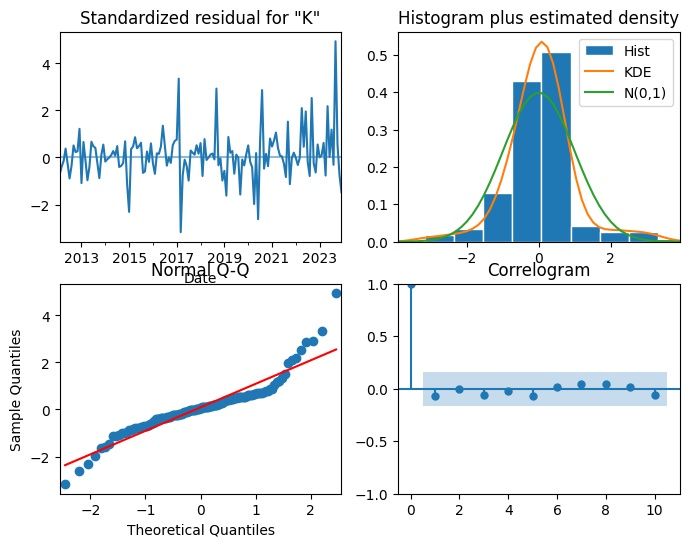

In [117]:
ksm_kerosene_results.plot_diagnostics(figsize=(8,6))
plt.show()

In [118]:
# Forecast 'Kerosene_with_Exchange_Rate'
kerosene_pred = ksm_kerosene_results.get_prediction(start=pd.to_datetime('2021-05-15'), dynamic=False)
#pred_ci = kerosene_pred.conf_int()

In [119]:
kerosene_forecasted = kerosene_pred.predicted_mean

# Divide 'Kerosene_with_Exchange_Rate' prediction by 'Exchange_Rate' prediction to get final 'Kerosene' prices prediction
final_kerosene_forecasted = kerosene_forecasted / exchange_rate_forecasted

In [120]:
kerosene_truth = kisumu_data['2021-05-15':]
kerosene_truth['Pred_Kerosene'] = final_kerosene_forecasted
print(kerosene_truth[['Kerosene', 'Pred_Kerosene']])

         Kerosene  Pred_Kerosene
Date                            
2021-05    102.37     102.462548
2021-06     98.68      97.633245
2021-07     98.68     100.606318
2021-08     98.68     105.023683
2021-09    111.54     101.020853
2021-10    104.26     112.750678
2021-11    104.26     105.418505
2021-12    104.26     103.511271
2022-01    104.26     105.222800
2022-02    104.26     106.352948
2022-03    104.26     104.180651
2022-04    114.16     100.663499
2022-05    119.66     117.706510
2022-06    128.66     116.805397
2022-07    128.66     130.680135
2022-08    128.66     133.526604
2022-09    148.66     135.541063
2022-10    147.66     147.286653
2022-11    146.66     150.804364
2022-12    146.66     146.812238
2023-01    146.66     148.278042
2023-02    146.66     149.669687
2023-03    146.66     147.554892
2023-04    146.66     149.553798
2023-05    161.35     152.332413
2023-06    161.70     162.214595
2023-07    169.74     164.836144
2023-08    169.74     172.563034
2023-09   

In [121]:
# Check model accuracy
# R-squared (r2) score
r2 = r2_score(kerosene_truth['Kerosene'], kerosene_truth['Pred_Kerosene'])
print('r2 score =', r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(kerosene_truth['Kerosene'], kerosene_truth['Pred_Kerosene'])
print('Mean Absolute Error (MAE) =', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(kerosene_truth['Kerosene'], kerosene_truth['Pred_Kerosene'])
print('Mean Squared Error (MSE) =', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) =', rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((kerosene_truth['Kerosene'] - kerosene_truth['Pred_Kerosene']) / kerosene_truth['Kerosene'])) * 100
print('Mean Absolute Percentage Error (MAPE) =', mape)

r2 score = 0.9579477251997861
Mean Absolute Error (MAE) = 4.542770143251985
Mean Squared Error (MSE) = 46.1202996373782
Root Mean Squared Error (RMSE) = 6.791192799308396
Mean Absolute Percentage Error (MAPE) = 3.283903131467277


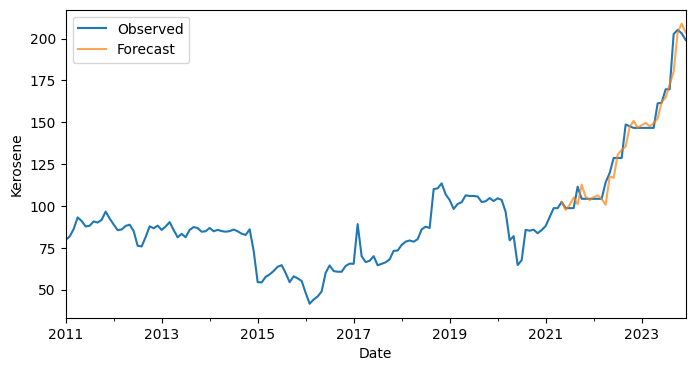

In [122]:
# Plot observed 'Kerosene_with_Exchange_Rate' and forecasted 'Kerosene_with_Exchange_Rate'
ax = kisumu_data['Kerosene'].plot(label='Observed', figsize=(8, 4))
final_kerosene_forecasted.plot(ax=ax, label='Forecast', alpha=0.7)
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Kerosene')
plt.legend()
plt.show()

In [123]:
# Save models using pickle
pickle.dump(ksm_kerosene_results, open('ksm_kerosene_model.pkl', 'wb'))

# Deployment

In [124]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


In [125]:
!wget -q -O - ipv4.icanhazip.com

35.204.101.239


In [126]:
!streamlit run /content/App.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: /content/App.py
npx: installed 22 in 4.516s
your url is: https://ten-apes-give.loca.lt
^C


In [127]:
# import pickle
# import datetime
# import pandas as pd
# import streamlit as st
# import matplotlib.pyplot as plt

# st.set_option('deprecation.showPyplotGlobalUse', False)

# # Add an image.
# st.image('/content/fuel-price.jpg')

# def load_model(model_path):
#     return pickle.load(open(model_path, 'rb'))

# def fuel_prediction(start_date, pred_period, exchange_rate_model, town_model):
#     try:
#         # Forecast exchange rate
#         exchange_rate_pred = exchange_rate_model.get_forecast(steps=pred_period)
#         exchange_rate_forecasted = exchange_rate_pred.predicted_mean

#         # Forecast town fuel prices
#         town_pred = town_model.get_forecast(steps=pred_period)
#         town_forecasted = town_pred.predicted_mean

#         # Divide town fuel prices by exchange rate to get final predictions
#         final_forecasted = town_forecasted / exchange_rate_forecasted

#         return final_forecasted, exchange_rate_forecasted
#     except Exception as e:
#         st.error(f"Error occurred: {e}")

# # Title
# st.title("Fuel Price Predictor")

# # Load exchange rate model
# exchange_rate_model = load_model('/content/exchange_rate_model.pkl')

# # Load all models for Nairobi
# nrb_super_model = load_model('/content/nrb_super_model.pkl')
# nrb_diesel_model = load_model('/content/nrb_diesel_model.pkl')
# nrb_kerosene_model = load_model('/content/nrb_kerosene_model.pkl')

# # Load all models for Mombasa
# mbs_super_model = load_model('/content/mbs_super_model.pkl')
# mbs_diesel_model = load_model('/content/mbs_diesel_model.pkl')
# mbs_kerosene_model = load_model('/content/mbs_kerosene_model.pkl')

# # Load all models for Kisumu
# ksm_super_model = load_model('/content/ksm_super_model.pkl')
# ksm_diesel_model = load_model('/content/ksm_diesel_model.pkl')
# ksm_kerosene_model = load_model('/content/ksm_kerosene_model.pkl')

# # Getting input data from the user
# start_date = st.date_input('Start date', datetime.date(2023, 12, 15))
# pred_period = st.number_input('Prediction period', step=1, value=None)

# def main():
#   # Creating buttons for prediction
#   if st.button('Fuel predictions'):
#     # Perform prediction for Nairobi
#     st.subheader("Nairobi Predictions:")
#     nrb_super_pred, exchange_rate_pred = fuel_prediction(start_date, pred_period, exchange_rate_model, nrb_super_model)
#     nrb_diesel_pred, _ = fuel_prediction(start_date, pred_period, exchange_rate_model, nrb_diesel_model)
#     nrb_kerosene_pred, _ = fuel_prediction(start_date, pred_period, exchange_rate_model, nrb_kerosene_model)

#     # Create DataFrame for predictions
#     index = pd.date_range(start=start_date, periods=pred_period, freq='MS') + pd.Timedelta(days=14)
#     nairobi_predictions = pd.DataFrame({
#          'Date': index,
#          'Exchange_Rate': exchange_rate_pred,
#          'Nairobi Super Prediction': nrb_super_pred,
#          'Nairobi Diesel Prediction': nrb_diesel_pred,
#          'Nairobi Kerosene Prediction': nrb_kerosene_pred
#       })
#     nairobi_predictions.set_index('Date', inplace=True)
#     st.write(nairobi_predictions)

#     # Plot fuel prices for Nairobi
#     #st.write("Nairobi Fuel Price Predictions")
#     plt.figure(figsize=(6, 4))
#     plt.plot(nairobi_predictions.index, nairobi_predictions['Nairobi Super Prediction'], label='Nairobi Super')
#     plt.plot(nairobi_predictions.index, nairobi_predictions['Nairobi Diesel Prediction'], label='Nairobi Diesel')
#     plt.plot(nairobi_predictions.index, nairobi_predictions['Nairobi Kerosene Prediction'], label='Nairobi Kerosene')
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.title('Nairobi Fuel Price Predictions')
#     plt.legend()
#     st.pyplot()

#     # Predictions for Mombasa
#     st.subheader("Mombasa Predictions")
#     mombasa_super_pred, _ = fuel_prediction(start_date, pred_period, exchange_rate_model, mbs_super_model)
#     mombasa_diesel_pred, _ = fuel_prediction(start_date, pred_period, exchange_rate_model, mbs_diesel_model)
#     mombasa_kerosene_pred, _ = fuel_prediction(start_date, pred_period, exchange_rate_model, mbs_kerosene_model)

#     mombasa_predictions = pd.DataFrame({
#           'Date': index,
#           'Exchange_Rate': exchange_rate_pred,
#           'Mombasa Super Prediction': mombasa_super_pred,
#           'Mombasa Diesel Prediction': mombasa_diesel_pred,
#           'Mombasa Kerosene Prediction': mombasa_kerosene_pred
#       })
#     mombasa_predictions.set_index('Date', inplace=True)
#     st.write(mombasa_predictions)

#     # Plot fuel prices for Mombasa
#     #st.write("Mombasa Fuel Price Predictions")

#     width = st.sidebar.slider("plot width", 1, 10, 6)
#     height = st.sidebar.slider("plot height", 1, 10, 4)

#     fig, ax = plt.subplots(figsize=(width, height))
#     ax.plot(mombasa_predictions.index, mombasa_predictions['Mombasa Super Prediction'], label='Mombasa Super')
#     ax.plot(mombasa_predictions.index, mombasa_predictions['Mombasa Diesel Prediction'], label='Mombasa Diesel')
#     ax.plot(mombasa_predictions.index, mombasa_predictions['Mombasa Kerosene Prediction'], label='Mombasa Kerosene')
#     ax.legend()

#     st.pyplot(fig)

#     # plt.figure(figsize=(6, 4))
#     # plt.plot(mombasa_predictions.index, mombasa_predictions['Mombasa Super Prediction'], label='Mombasa Super')
#     # plt.plot(mombasa_predictions.index, mombasa_predictions['Mombasa Diesel Prediction'], label='Mombasa Diesel')
#     # plt.plot(mombasa_predictions.index, mombasa_predictions['Mombasa Kerosene Prediction'], label='Mombasa Kerosene')
#     # plt.xlabel('Date')
#     # plt.ylabel('Price')
#     # plt.title('Mombasa Fuel Price Predictions')
#     # plt.legend()
#     # st.pyplot()

#     # Predictions for Kisumu
#     st.subheader("Kisumu Predictions")
#     kisumu_super_pred, _ = fuel_prediction(start_date, pred_period, exchange_rate_model, ksm_super_model)
#     kisumu_diesel_pred, _ = fuel_prediction(start_date, pred_period, exchange_rate_model, ksm_diesel_model)
#     kisumu_kerosene_pred, _ = fuel_prediction(start_date, pred_period, exchange_rate_model, ksm_kerosene_model)

#     kisumu_predictions = pd.DataFrame({
#          'Date': index,
#          'Exchange_Rate': exchange_rate_pred,
#          'Kisumu Super Prediction': kisumu_super_pred,
#          'Kisumu Diesel Prediction': kisumu_diesel_pred,
#          'Kisumu Kerosene Prediction': kisumu_kerosene_pred
#       })
#     kisumu_predictions.set_index('Date', inplace=True)
#     st.write(kisumu_predictions)

#     # Plot fuel prices for NaKisumuirobi
#     #st.write("Kisumu Fuel Price Predictions")
#     plt.figure(figsize=(6, 4))
#     plt.plot(kisumu_predictions.index, kisumu_predictions['Kisumu Super Prediction'], label='Kisumu Super')
#     plt.plot(kisumu_predictions.index, kisumu_predictions['Kisumu Diesel Prediction'], label='Kisumu Diesel')
#     plt.plot(kisumu_predictions.index, kisumu_predictions['Kisumu Kerosene Prediction'], label='Kisumu Kerosene')
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.title('Kisumu Fuel Price Predictions')
#     plt.legend()
#     st.pyplot()


# if __name__ == '__main__':
#     main()

In [128]:
# import pickle
# import datetime
# import pandas as pd
# import streamlit as st

# def load_model(model_path):
#     return pickle.load(open(model_path, 'rb'))

# def fuel_prediction(start_date, pred_period, exchange_rate_model, town_model):
#     try:
#         # Forecast exchange rate
#         exchange_rate_pred = exchange_rate_model.get_forecast(steps=pred_period)
#         exchange_rate_forecasted = exchange_rate_pred.predicted_mean

#         # Forecast town fuel prices
#         town_pred = town_model.get_forecast(steps=pred_period)
#         town_forecasted = town_pred.predicted_mean

#         # Divide town fuel prices by exchange rate to get final predictions
#         final_forecasted = town_forecasted / exchange_rate_forecasted

#         return final_forecasted, exchange_rate_forecasted
#     except Exception as e:
#         st.error(f"Error occurred: {e}")

# # Title
# st.title("Fuel Price Predictor")

# # Load exchange rate model
# exchange_rate_model = load_model('/content/exchange_rate_model.pkl')

# # Load all models for Nairobi
# nrb_super_model = load_model('/content/nrb_super_model.pkl')
# nrb_diesel_model = load_model('/content/nrb_diesel_model.pkl')
# nrb_kerosene_model = load_model('/content/nrb_kerosene_model.pkl')

# # Sample input parameters
# start_date = datetime.date(2023, 12, 15)
# pred_period = 12  # Example prediction period of 12 months

# # Perform prediction for Nairobi
# nrb_super_pred, exchange_rate_pred = fuel_prediction(start_date, pred_period, exchange_rate_model, nrb_super_model)
# nrb_diesel_pred, _ = fuel_prediction(start_date, pred_period, exchange_rate_model, nrb_diesel_model)
# nrb_kerosene_pred, _ = fuel_prediction(start_date, pred_period, exchange_rate_model, nrb_kerosene_model)

# # Create DataFrame for predictions
# index = pd.date_range(start=start_date, periods=pred_period, freq='MS') + pd.Timedelta(days=14)
# nairobi_predictions = pd.DataFrame({
#     'Date': index,
#     'Exchange_Rate': exchange_rate_pred,
#     'Nairobi Super Prediction': nrb_super_pred,
#     'Nairobi Diesel Prediction': nrb_diesel_pred,
#     'Nairobi Kerosene Prediction': nrb_kerosene_pred
# })
# nairobi_predictions.set_index('Date', inplace=True)

# # Display predictions
# st.subheader("Nairobi Predictions:")
# st.write(nairobi_predictions)

In [129]:
# Colab

In [130]:
# import pickle
# import datetime
# import warnings
# import pandas as pd

# warnings.filterwarnings('ignore')

# def load_model(model_path):
#     return pickle.load(open(model_path, 'rb'))

# # Load exchange rate model
# exchange_rate_model = load_model('/content/exchange_rate_model.pkl')

# # Load all models for Nairobi
# nrb_super_model = load_model('/content/nrb_super_model.pkl')
# nrb_diesel_model = load_model('/content/nrb_diesel_model.pkl')
# nrb_kerosene_model = load_model('/content/nrb_kerosene_model.pkl')

# # Load all models for Mombasa
# mbs_super_model = load_model('/content/mbs_super_model.pkl')
# mbs_diesel_model = load_model('/content/mbs_diesel_model.pkl')
# mbs_kerosene_model = load_model('/content/mbs_kerosene_model.pkl')

# # Load all models for Kisumu
# ksm_super_model = load_model('/content/ksm_super_model.pkl')
# ksm_diesel_model = load_model('/content/ksm_diesel_model.pkl')
# ksm_kerosene_model = load_model('/content/ksm_kerosene_model.pkl')

# def fuel_prediction(start_date, pred_period, exchange_rate_model, town_models):
#     try:
#         # Forecast exchange rate
#         exchange_rate_pred = exchange_rate_model.get_forecast(steps=pred_period)
#         exchange_rate_forecasted = exchange_rate_pred.predicted_mean

#         # Create DataFrame for exchange rate predictions
#         index = pd.date_range(start=start_date, periods=pred_period, freq='MS') + pd.Timedelta(days=14)
#         exchange_rate_df = pd.DataFrame({
#             'Date': index,
#             'Exchange_Rate': exchange_rate_forecasted,
#         })
#         exchange_rate_df.set_index('Date', inplace=True)

#         # Create DataFrame for fuel predictions for each town
#         town_predictions = {}
#         for town, model in town_models.items():
#             town_pred = model.get_forecast(steps=pred_period)
#             town_forecasted = town_pred.predicted_mean
#             final_forecasted = town_forecasted / exchange_rate_forecasted
#             town_predictions[town] = pd.DataFrame(final_forecasted, columns=[f"{town}_Super", f"{town}_Diesel", f"{town}_Kerosene"], index=index)

#         # Merge all predictions into one DataFrame
#         predictions_df = pd.concat([exchange_rate_df] + list(town_predictions.values()), axis=1)

#         return predictions_df
#     except Exception as e:
#         print(f"Error occurred: {e}")

# # Sample input parameters
# start_date = datetime.date(2023, 12, 15)
# pred_period = 12  # Example prediction period of 12 months

# # Perform prediction for Nairobi
# nrb_super_pred = fuel_prediction(start_date, pred_period, exchange_rate_model, {'Nairobi': nrb_super_model})
# nrb_diesel_pred = fuel_prediction(start_date, pred_period, exchange_rate_model, {'Nairobi': nrb_diesel_model})
# nrb_kerosene_pred = fuel_prediction(start_date, pred_period, exchange_rate_model, {'Nairobi': nrb_kerosene_model})

# # Perform prediction for Mombasa
# mbs_super_pred = fuel_prediction(start_date, pred_period, exchange_rate_model, {'Mombasa': mbs_super_model})
# mbs_diesel_pred = fuel_prediction(start_date, pred_period, exchange_rate_model, {'Mombasa': mbs_diesel_model})
# mbs_kerosene_pred = fuel_prediction(start_date, pred_period, exchange_rate_model, {'Mombasa': mbs_kerosene_model})

# # Perform prediction for Kisumu
# ksm_super_pred = fuel_prediction(start_date, pred_period, exchange_rate_model, {'Kisumu': ksm_super_model})
# ksm_diesel_pred = fuel_prediction(start_date, pred_period, exchange_rate_model, {'Kisumu': ksm_diesel_model})
# ksm_kerosene_pred = fuel_prediction(start_date, pred_period, exchange_rate_model, {'Kisumu': ksm_kerosene_model})

# # Display predictions
# print("Nairobi Predictions:")
# print(nrb_super_pred)
# print(nrb_diesel_pred)
# print(nrb_kerosene_pred)

# print("Mombasa Predictions:")
# print(mbs_super_pred)
# print(mbs_diesel_pred)
# print(mbs_kerosene_pred)

# print("Kisumu Predictions:")
# print(ksm_super_pred)
# print(ksm_diesel_pred)
# print(ksm_kerosene_pred)


In [131]:
# import pickle
# import datetime
# import pandas as pd

# def load_model(model_path):
#     return pickle.load(open(model_path, 'rb'))

# def fuel_prediction(start_date, pred_period, exchange_rate_model, town_model):
#     try:
#         # Forecast exchange rate
#         exchange_rate_pred = exchange_rate_model.get_forecast(steps=pred_period)
#         exchange_rate_forecasted = exchange_rate_pred.predicted_mean

#         # Forecast town fuel prices
#         town_pred = town_model.get_forecast(steps=pred_period)
#         town_forecasted = town_pred.predicted_mean

#         # Divide town fuel prices by exchange rate to get final predictions
#         final_forecasted = town_forecasted / exchange_rate_forecasted

#         return final_forecasted, exchange_rate_forecasted
#     except Exception as e:
#         print(f"Error occurred: {e}")

# # Load exchange rate model
# exchange_rate_model = load_model('/content/exchange_rate_model.pkl')

# # Load all models for Nairobi
# nrb_super_model = load_model('/content/nrb_super_model.pkl')
# nrb_diesel_model = load_model('/content/nrb_diesel_model.pkl')
# nrb_kerosene_model = load_model('/content/nrb_kerosene_model.pkl')

# # Sample input parameters
# start_date = datetime.date(2023, 12, 15)
# pred_period = 12  # Example prediction period of 12 months

# # Perform prediction for Nairobi
# nrb_super_pred, exchange_rate_pred = fuel_prediction(start_date, pred_period, exchange_rate_model, nrb_super_model)
# nrb_diesel_pred, _ = fuel_prediction(start_date, pred_period, exchange_rate_model, nrb_diesel_model)
# nrb_kerosene_pred, _ = fuel_prediction(start_date, pred_period, exchange_rate_model, nrb_kerosene_model)

# # Create DataFrame for predictions
# index = pd.date_range(start=start_date, periods=pred_period, freq='MS') + pd.Timedelta(days=14)
# nairobi_predictions = pd.DataFrame({
#     'Date': index,
#     'Exchange_Rate': exchange_rate_pred,
#     'Nairobi Super Prediction': nrb_super_pred,
#     'Nairobi Diesel Prediction': nrb_diesel_pred,
#     'Nairobi Kerosene Prediction': nrb_kerosene_pred
# })
# nairobi_predictions.set_index('Date', inplace=True)

# print("Nairobi Predictions:")
# print(nairobi_predictions)
